In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_path = r'C:\Users\kumar\OneDrive\Desktop\lecture\mba classifier\train'
valid_path = r'C:\Users\kumar\OneDrive\Desktop\lecture\mba classifier\cv'


In [3]:
vgg = VGG16(input_shape=[224, 224,3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
  layer.trainable = False

In [5]:
folders = glob( r'C:\Users\kumar\OneDrive\Desktop\lecture\mba classifier\train/*')

In [6]:
folders

['C:\\Users\\kumar\\OneDrive\\Desktop\\lecture\\mba classifier\\train\\chinmay',
 'C:\\Users\\kumar\\OneDrive\\Desktop\\lecture\\mba classifier\\train\\divan',
 'C:\\Users\\kumar\\OneDrive\\Desktop\\lecture\\mba classifier\\train\\manish',
 'C:\\Users\\kumar\\OneDrive\\Desktop\\lecture\\mba classifier\\train\\rohit',
 'C:\\Users\\kumar\\OneDrive\\Desktop\\lecture\\mba classifier\\train\\shivanshu',
 'C:\\Users\\kumar\\OneDrive\\Desktop\\lecture\\mba classifier\\train\\vipul']

In [7]:
x = Flatten()(vgg.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(6, activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# cv_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')
# cv_set = cv_datagen.flow_from_directory(valid_path,
#                                             target_size = (224, 224),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 331 images belonging to 6 classes.
Found 47 images belonging to 6 classes.


In [13]:
training_set.class_indices

{'chinmay': 0, 'divan': 1, 'manish': 2, 'rohit': 3, 'shivanshu': 4, 'vipul': 5}

In [14]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=6,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/6
67/67 [==============================] - 204s 3s/step - loss: 1.1820 - accuracy: 0.6647 - val_loss: 0.5792 - val_accuracy: 0.8511
Epoch 2/6
67/67 [==============================] - 225s 3s/step - loss: 0.1909 - accuracy: 0.9426 - val_loss: 0.4476 - val_accuracy: 0.8723
Epoch 3/6
67/67 [==============================] - 218s 3s/step - loss: 0.0741 - accuracy: 0.9698 - val_loss: 0.0445 - val_accuracy: 0.9787
Epoch 4/6
67/67 [==============================] - 204s 3s/step - loss: 0.0668 - accuracy: 0.9879 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 5/6
67/67 [==============================] - 191s 3s/step - loss: 0.1443 - accuracy: 0.9547 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 6/6
67/67 [==============================] - 176s 3s/step - loss: 0.0375 - accuracy: 0.9849 - val_loss: 0.2114 - val_accuracy: 0.9362


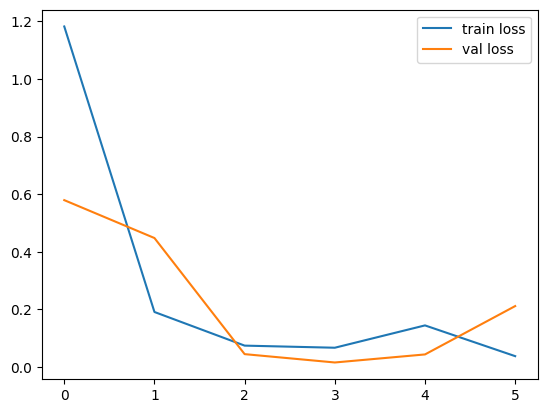

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

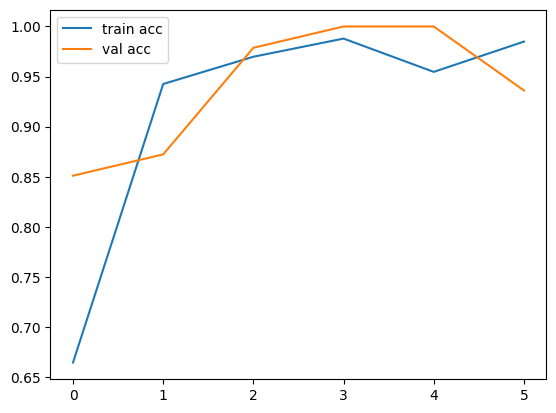

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [17]:
from keras.models import load_model

model.save('mba_vgg.h5')